# Electromiografía: Cuantificación de Áreas.
### Flores Oliva Alejandro Elliot
#### Licenciatura en Física Biomédica en Ciencias Biológicas , Facultad de Ciencias, Universidad Nacional Autónoma de México.

## Índice:


[1. Cuantificación de Áreas con valores absolutos positivos.](#6)

>[1.1 Área de valor absoluto con filtro Savitzky-Golay.](#7)

>[1.2 Área de valor absoluto con filtro mediano.](#8)

>[1.4 Área de valor absoluto con filtro Butterworth.](#10)


## Obtención y visualización de señales electromiográficas.

##### Librerías utilizadas
Importamos las librerías/ módulos que nos permitirán hacer cálculos, filtrar datos, utilizar filtros, análisis, etc.

In [1]:
import matplotlib.pyplot as plt           #Nos provee de un framework de gráficos parecido a MATLAB.
import numpy as np                        #Es una biblioteca para crear vectores y matrices grandes multidimensionales.
import wave      
from scipy.io import wavfile              #El módulo proporciona una interfaz para el formato de sonido WAV.
from scipy.signal import butter, filtfilt #Permite hacer procesamiento de señales con filtro Butterworth. 
from scipy.signal import medfilt          #Permite hacer procesamiento de señales con filtro mediano.
from scipy.signal import savgol_filter    #Permite hacer procesamiento de señales con filtro Savitzky-Golay.            

In [2]:
# Cargar el archivo .wav de dos canales
sample_rate, filedata = wavfile.read('../Parkinson Notebooks/1-Registros-EMG/Sin medicamento/SM_Registro_AbdCorto_Relajación.wav')

archivo='../Parkinson Notebooks/1-Registros-EMG/Sin medicamento/SM_Registro_AbdCorto_Relajación.wav'
# Visualización del archivo .wav, es necesario saber la ubicación del archivo y su nombre.
#Los archivos WAV contienen una secuencia de bits que representan los datos de audio sin procesar.
record = wave.open(archivo)

# Asumiendo que el archivo tiene dos canales, puedes acceder a ellos por separado
Canal1 = filedata[:, 0]
Canal2 = filedata[:, 1]

# Calcular la duración de la señal en segundos
duration = len(Canal1) / sample_rate

#Obtención del número de canales, frecuencia de muestreo, número de fotogramas. 
NumCanales = record.getnchannels()      #Número de canales y retorna el número de canales de audio. 
N= record.getnframes()                  #Número de fotogramas.
FrecMuestreo = record.getframerate()    #Retorna la frecuencia del muestreo.
AnchoMuestra=record.getsampwidth()      #Retorna el ancho de la muestra en bytes.
    
#Análisis de datos del archivo .wav
dstr = record.readframes(N * NumCanales) #Lee y retorna como máximo n cuadros de audio, como un objeto bytes.
waveData = np.frombuffer(dstr, np.int16) #np.frombuffer es una función para crear una matriz unidimensional utilizando un búfer. 
#El módulo de ondas "wave" proporciona una interfaz conveniente para el formato de sonido WAV. 
    
# Crear un arreglo de tiempo en segundos, tomamos cualquier canal, ya que ambos duran lo mismo.
tiempo = np.linspace(0, duration, len(Canal1))

<a id='1'></a>
## Cuantificación de Áreas. 

Saber el área de una señal de electromiografía (EMG) proporciona información útil sobre la actividad muscular. **El área bajo la curva de la señal de EMG se utiliza a menudo como una medida cuantitativa de la amplitud o fuerza de la contracción muscular**.El análisis del área de una señal de EMG nos permite:

>Análisis de la fuerza (contracción) muscular: El área bajo la curva del EMG se correlaciona con la fuerza generada por el músculo. Al comparar el área en diferentes períodos de tiempo o entre diferentes músculos, se puede obtener información sobre la fuerza relativa de la contracción muscular.

>Evaluación de la fatiga muscular: A medida que un músculo se fatiga, la amplitud de la señal EMG disminuirá y, por lo tanto, el área bajo la curva también puede disminuir.

>Análisis de diferentes actividades musculares: Al calcular el área bajo la curva para diferentes músculos o durante diferentes actividades musculares, se puede comparar la activación relativa de los músculos y evaluar la eficiencia del patrón de reclutamiento muscular (neuronas motoras).

<a id='6'></a>
## Cuantificación de Áreas con valores absolutos positivos.

## Área de valor absoluto de cada canal sin filtros

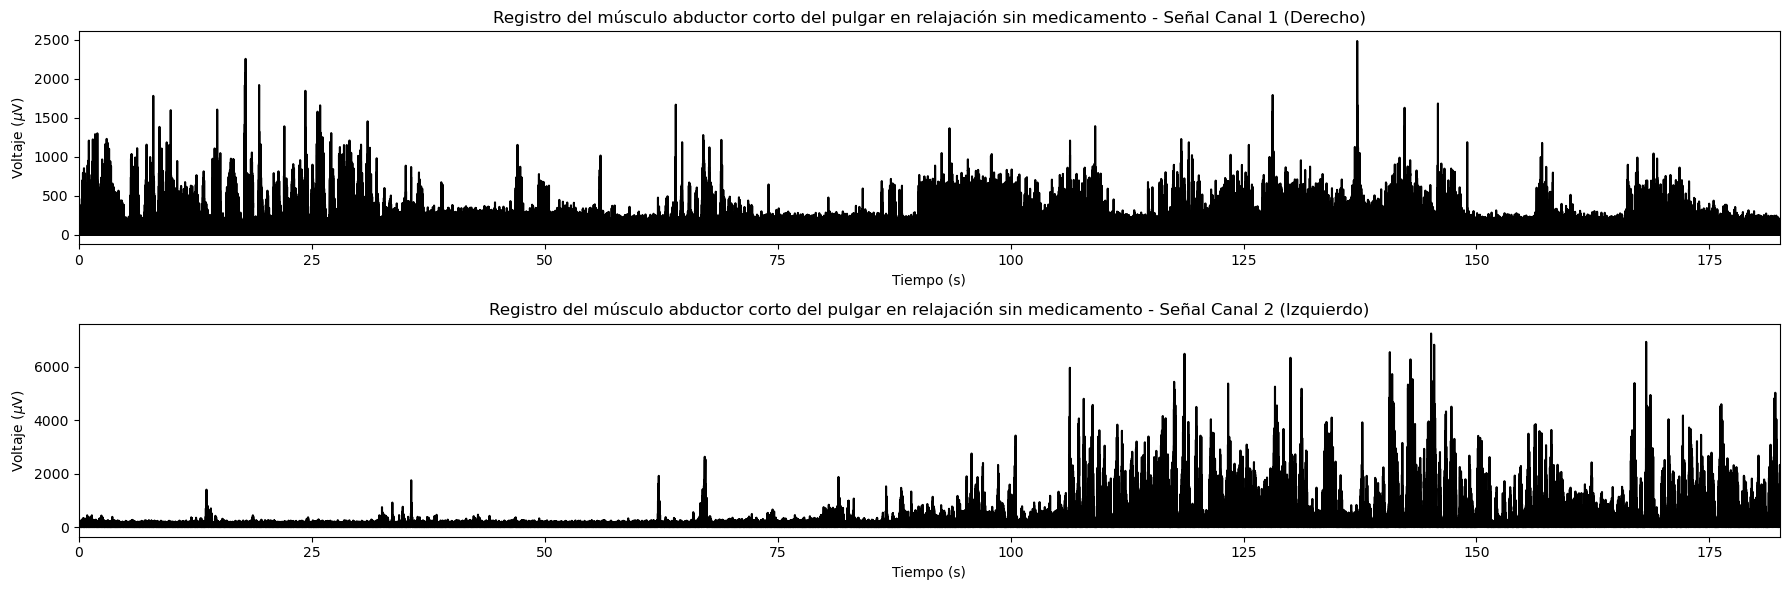

Área del canal 1: 76350434
Área del canal 2: 167449421


In [3]:
# Calcular el valor absoluto de los canales y considerar únicamente los valores positivos
Abs_canal1 = np.abs(Canal1)
Abs_canal2 = np.abs(Canal2)

# Calcular el área de los valores positivos del absoluto para cada canal
area_channel1 = np.sum(np.abs(Canal1[Canal1 > 0]))
area_channel2 = np.sum(np.abs(Canal2[Canal2 > 0]))

# Graficar las señales por separado
plt.figure(figsize=(18, 6))

plt.subplot(211)
plt.plot(tiempo, Abs_canal1, color='black')
plt.xlabel('Tiempo (s)')
plt.xlim(0,max(tiempo))
plt.ylabel('Voltaje ($\mu$V)')
plt.title('Registro del músculo abductor corto del pulgar en relajación sin medicamento - Señal Canal 1 (Derecho)')

plt.subplot(212)
plt.plot(tiempo, Abs_canal2, color='black')
plt.xlabel('Tiempo (s)')
plt.xlim(0,max(tiempo))
plt.ylabel('Voltaje ($\mu$V)')
plt.title('Registro del músculo abductor corto del pulgar en relajación sin medicamento - Señal Canal 2 (Izquierdo)')

plt.tight_layout()
plt.show()

# Imprimir el área de cada canal
print("Área del canal 1:", area_channel1)
print("Área del canal 2:", area_channel2)


<a id='7'></a>
### Área de valor absoluto con filtro Savitzky-Golay

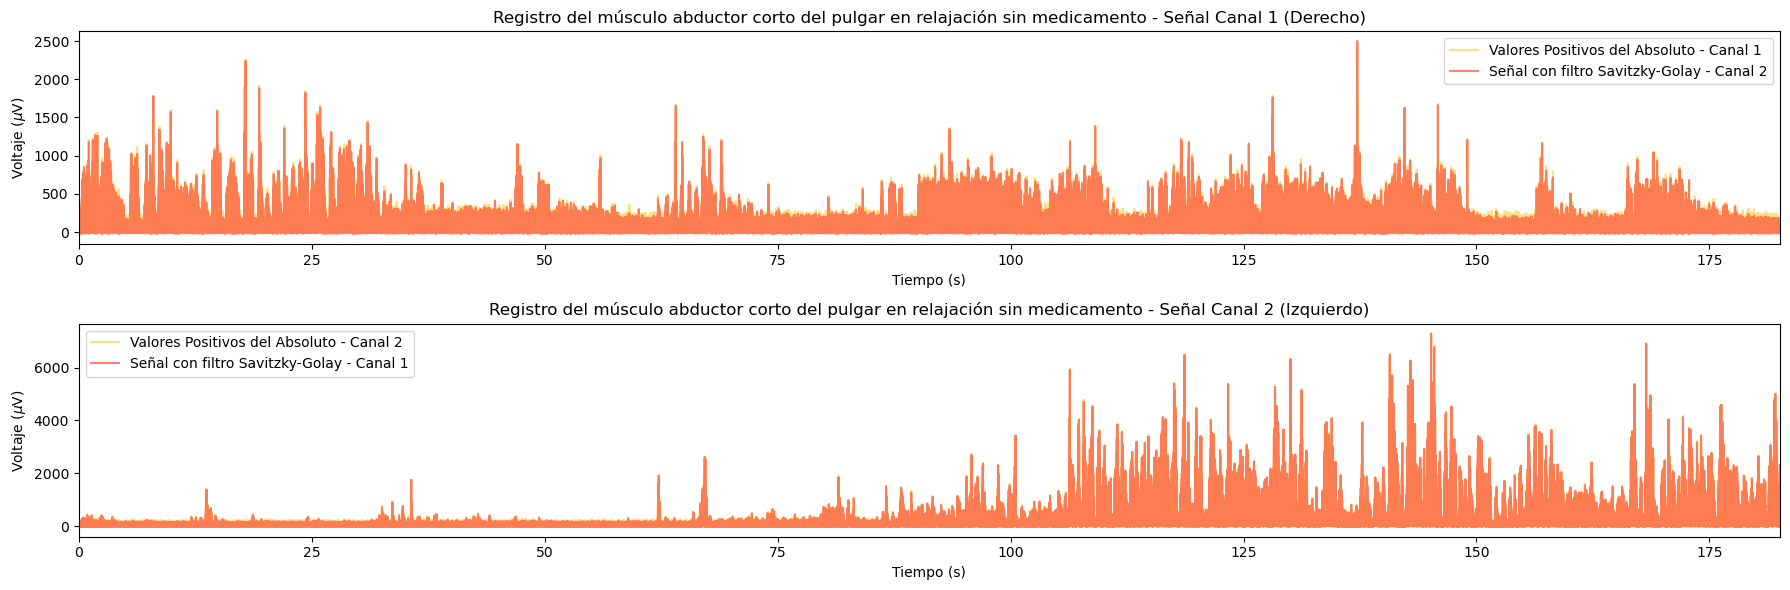

Área bajo la curva:
Canal 1 (área bajo la curva de los valores absolutos positivos): 15237.291614285701
Canal 2 (área bajo la curva de los valores absolutos positivos): 33447.99306285713


In [4]:
# Calcular el valor absoluto de los canales y considerar únicamente los valores positivos
Abs_canal1 = np.abs(Canal1)
Abs_canal2 = np.abs(Canal2)

# Calcular el área bajo la curva de los valores absolutos positivos de los canales
#Area_canal1 = np.sum(Abs_canal1) / sample_rate
#Area_canal2 = np.sum(Abs_canal2) / sample_rate

# Filtrar los canales con un filtro Savitzky-Golay de segundo orden
filtro_order = 2
window_length = 5
Canal1_SavitzkyGolay = savgol_filter(Abs_canal1, window_length, filtro_order)
Canal2_SavitzkyGolay  = savgol_filter(Abs_canal2, window_length, filtro_order)

# Calcular el área de la señal filtrada para cada canal
Area_canal1 = np.sum(Canal1_SavitzkyGolay)/sample_rate
Area_canal2 = np.sum(Canal2_SavitzkyGolay)/sample_rate 

# Graficar la señal original y la señal filtrada del canal 1
plt.figure(figsize=(18, 6))
plt.subplot(211)
plt.plot(tiempo, Abs_canal1, label='Valores Positivos del Absoluto - Canal 1',color='#FAC205', alpha=0.5)
plt.plot(tiempo, Canal1_SavitzkyGolay, label='Señal con filtro Savitzky-Golay - Canal 2', color='#FF6347', alpha=0.8)
plt.title('Registro del músculo abductor corto del pulgar en relajación sin medicamento - Señal Canal 1 (Derecho)')
plt.xlabel('Tiempo (s)')
plt.xlim(0,max(tiempo))
plt.ylabel('Voltaje ($\mu$V)')
plt.legend()

# Graficar la señal original y la señal filtrada del canal 2
plt.subplot(212)
plt.plot(tiempo, Abs_canal2, label='Valores Positivos del Absoluto - Canal 2',color='#FAC205', alpha=0.5)
plt.plot(tiempo, Canal2_SavitzkyGolay, label='Señal con filtro Savitzky-Golay - Canal 1', color='#FF6347', alpha=0.8)
plt.title('Registro del músculo abductor corto del pulgar en relajación sin medicamento - Señal Canal 2 (Izquierdo)')
plt.xlabel('Tiempo (s)')
plt.xlim(0,max(tiempo))
plt.ylabel('Voltaje ($\mu$V)')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir el área bajo la curva de los valores absolutos positivos de los canales
print('Área bajo la curva:')
print('Canal 1 (área bajo la curva de los valores absolutos positivos):', Area_canal1)
print('Canal 2 (área bajo la curva de los valores absolutos positivos):', Area_canal2)

<a id='8'></a>
### Área de valor absoluto con filtro mediano

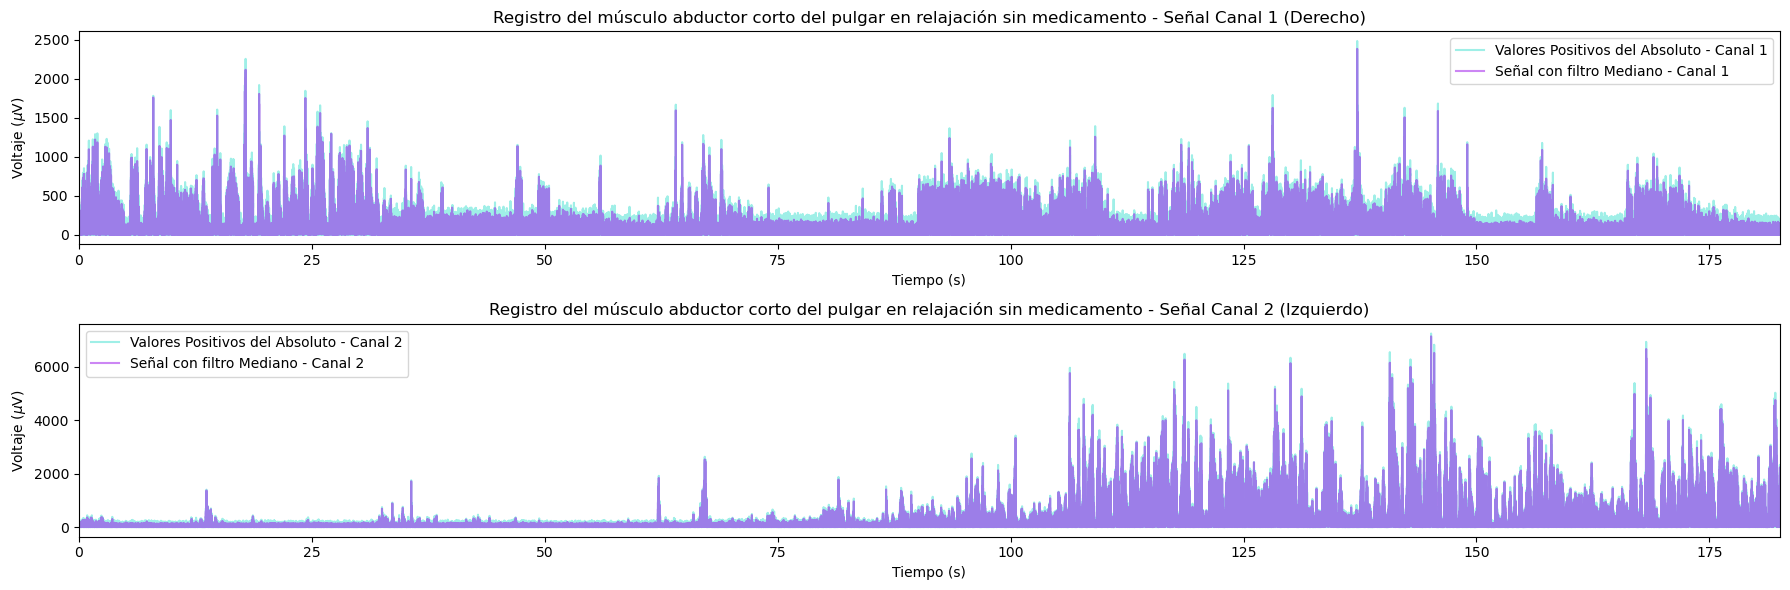

Área bajo la curva:
Canal 1 (área bajo la curva de los valores absolutos positivos): 14363.9304
Canal 2 (área bajo la curva de los valores absolutos positivos): 33014.0583


In [5]:
# Calcular el valor absoluto de los canales y considerar únicamente los valores positivos
Abs_canal1 = np.abs(Canal1)
Abs_canal2 = np.abs(Canal2)

# Filtrar los canales con un filtro mediano de tamaño 5
canal1_filtroMediano1 = medfilt(Abs_canal1, kernel_size=5)
canal2_filtroMediano2 = medfilt(Abs_canal2, kernel_size=5)

# Calcular el área bajo la curva de los valores absolutos positivos de los canales
area_canal1 = np.sum(canal1_filtroMediano1) / sample_rate
area_canal2 = np.sum(canal2_filtroMediano2) / sample_rate

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(18, 6))
plt.subplot(211)
plt.plot(tiempo, Abs_canal1, label='Valores Positivos del Absoluto - Canal 1', color='#40E0D0',alpha=0.5)
plt.plot(tiempo, canal1_filtroMediano1, label='Señal con filtro Mediano - Canal 1', color='#9A0EEA',alpha=0.5)
plt.title('Registro del músculo abductor corto del pulgar en relajación sin medicamento - Señal Canal 1 (Derecho)')
plt.xlabel('Tiempo (s)')
plt.xlim(0,max(tiempo))
plt.ylabel('Voltaje ($\mu$V)')
plt.legend()

plt.subplot(212)
plt.plot(tiempo, Abs_canal2, label='Valores Positivos del Absoluto - Canal 2', color='#40E0D0',alpha=0.5)
plt.plot(tiempo, canal2_filtroMediano2, label='Señal con filtro Mediano - Canal 2', color='#9A0EEA',alpha=0.5)
plt.title('Registro del músculo abductor corto del pulgar en relajación sin medicamento - Señal Canal 2 (Izquierdo)')
plt.xlabel('Tiempo (s)')
plt.xlim(0,max(tiempo))
plt.ylabel('Voltaje ($\mu$V)')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir el área bajo la curva de los valores absolutos positivos de los canales
print('Área bajo la curva:')
print('Canal 1 (área bajo la curva de los valores absolutos positivos):', area_canal1)
print('Canal 2 (área bajo la curva de los valores absolutos positivos):', area_canal2)

<a id='10'></a>
### Área de valor absoluto con filtro Butterworth

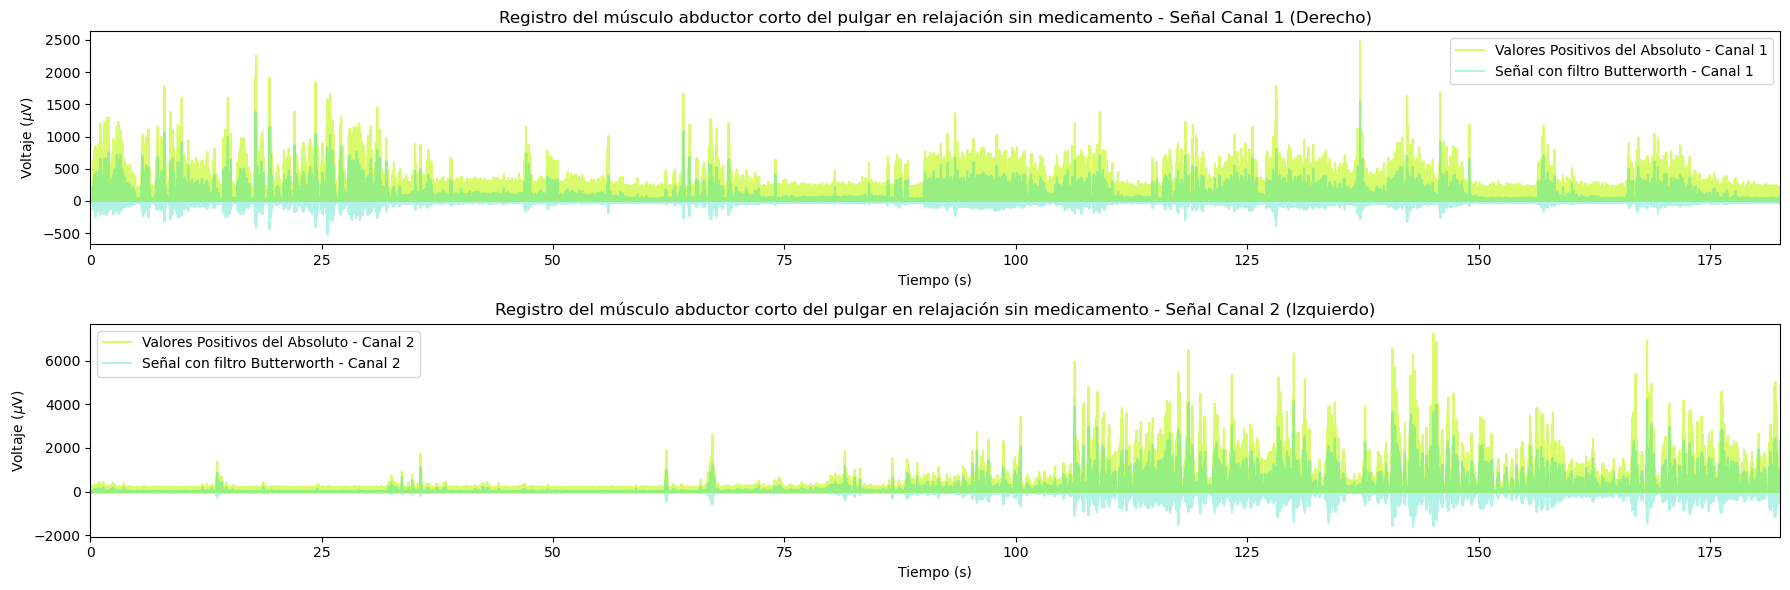

Área bajo la curva:
Canal 1 (área bajo la curva de los valores absolutos positivos): 3002.1270680439634
Canal 2 (área bajo la curva de los valores absolutos positivos): 8060.564644587122


In [6]:
# Calcular el valor absoluto de los canales y considerar únicamente los valores positivos
Abs_canal1 = np.abs(Canal1)
Abs_canal2 = np.abs(Canal2)

# Definir los parámetros del filtro Butterworth
order = 4  # Orden del filtro
lowcut = 10  # Frecuencia de corte inferior en Hz
highcut = 400  # Frecuencia de corte superior en Hz
nyquist = 0.5 * sample_rate
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(order, [low, high], btype='band')

# Filtrar los canales con un filtro Butterworth de 4to orden
canal1_filtroButterworth = filtfilt(b, a, Abs_canal1)
canal2_filtroButterworth = filtfilt(b, a, Abs_canal2)

# Calcular el área bajo la curva de los valores positivos del absoluto
area_canal1 = np.sum(canal1_filtroButterworth[canal1_filtroButterworth > 0]) / sample_rate
area_canal2 = np.sum(canal2_filtroButterworth[canal2_filtroButterworth > 0]) / sample_rate

# Calcular el área bajo la curva de los valores positivos del absoluto
#area_canal1 = np.sum(Abs_canal1[Abs_canal1 > 0]) / sample_rate
#area_canal2 = np.sum(Abs_canal2[Abs_canal2 > 0]) / sample_rate

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(18, 6))
plt.subplot(211)
plt.plot(tiempo, Abs_canal1, label='Valores Positivos del Absoluto - Canal 1',color='#C1F80A', alpha=0.6)
plt.plot(tiempo, canal1_filtroButterworth, label='Señal con filtro Butterworth - Canal 1',color='#04D8B2', alpha=0.3)
plt.title('Registro del músculo abductor corto del pulgar en relajación sin medicamento - Señal Canal 1 (Derecho)')
plt.xlabel('Tiempo (s)')
plt.xlim(0,max(tiempo))
plt.ylabel('Voltaje ($\mu$V)')
plt.legend()

plt.subplot(212)
plt.plot(tiempo, Abs_canal2, label='Valores Positivos del Absoluto - Canal 2',color='#C1F80A', alpha=0.6)
plt.plot(tiempo, canal2_filtroButterworth, label='Señal con filtro Butterworth - Canal 2',color='#04D8B2', alpha=0.3)
plt.title('Registro del músculo abductor corto del pulgar en relajación sin medicamento - Señal Canal 2 (Izquierdo)')
plt.xlabel('Tiempo (s)')
plt.xlim(0,max(tiempo))
plt.ylabel('Voltaje ($\mu$V)')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir el área bajo la curva de los valores absolutos positivos de los canales
print('Área bajo la curva:')
print('Canal 1 (área bajo la curva de los valores absolutos positivos):', area_canal1)
print('Canal 2 (área bajo la curva de los valores absolutos positivos):', area_canal2)

Registros y Notebook elaborado por Alejandro Elliot Flores Oliva, licenciatura en Física Biomédica, Facultad de Ciencias, Universidad Autónoma de México (UNAM), correo: elliotflooli@ciencias.unam.mx